In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import namedtuple, deque
from agent_rb import Agent_Rb
import torch

In [10]:
id=0
name = {0 :'CartPole-v0',
        1 :'MountainCar-v0',
        2 : 'LunarLander-v2'}

env = gym.make(name[id])
env.seed(0)
print('env :', name[id])
print('observation space:', env.observation_space)
print('action space:', env.action_space)

env : CartPole-v0
observation space: Box(4,)
action space: Discrete(2)


In [3]:
nS = env.observation_space.shape[0]
nA = env.action_space.n

In [4]:
nA

2

In [5]:
agent = Agent_Rb(state_size=nS, action_size=nA , seed=0, gamma=1, alpha= 1e-3)

# watch an untrained agent
state = env.reset()
for j in range(300):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break
env.close()

In [6]:
def dqn(n_episodes=1600, max_t=500, eps_start=1.0, eps_end=1e-2, eps_decay=0.955, disp = False):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    best_avg = -np.inf
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            
            if disp : env.render()
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        #if
        avg_score = np.mean(scores_window)
        print('\rEpisode {}\tAverage Score: {:.2f}\t Eps:{:.2e}'.format(i_episode, np.mean(scores_window),eps), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if avg_score > best_avg:
            print('\rBest Avg Score in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            best_avg = avg_score
            torch.save(agent.qnetwork.state_dict(), 'checkpoint' + name[id] + '.pth')    
            if avg_score >= 190.0:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
                torch.save(agent.qnetwork.state_dict(), 'checkpoint' + name[id] + '.pth')
                break
    if disp: env.close()
    return scores

scores = dqn()


Best Avg Score in -99 episodes!	Average Score: 39.00
Episode 100	Average Score: 21.22	 Eps:1.00e-02
Best Avg Score in 31 episodes!	Average Score: 40.01
Best Avg Score in 32 episodes!	Average Score: 41.22
Best Avg Score in 33 episodes!	Average Score: 43.09
Best Avg Score in 34 episodes!	Average Score: 44.99
Best Avg Score in 35 episodes!	Average Score: 46.89
Best Avg Score in 36 episodes!	Average Score: 48.80
Best Avg Score in 37 episodes!	Average Score: 50.71
Best Avg Score in 38 episodes!	Average Score: 52.62
Best Avg Score in 39 episodes!	Average Score: 54.48
Best Avg Score in 40 episodes!	Average Score: 56.39
Best Avg Score in 41 episodes!	Average Score: 58.30
Best Avg Score in 42 episodes!	Average Score: 60.21
Best Avg Score in 43 episodes!	Average Score: 62.10
Best Avg Score in 44 episodes!	Average Score: 64.01
Best Avg Score in 45 episodes!	Average Score: 65.92
Best Avg Score in 46 episodes!	Average Score: 67.83
Best Avg Score in 47 episodes!	Average Score: 69.69
Best Avg Score i

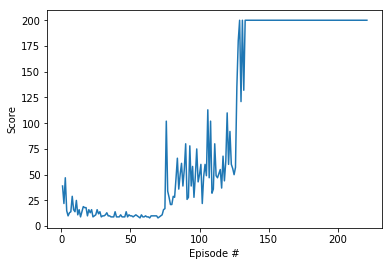

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [8]:
env = gym.make(name[id])
#agent.qnetwork.load_state_dict(torch.load('checkpoint' + name[id] + '.pth'))
for _ in range(3):
    state = env.reset()
    for t in range(15000):
        action = agent.act(state)
        env.render( )
        state, reward, done, _ = env.step(action)
        if done:
            break 

env.close()